<a href="https://colab.research.google.com/github/marques-viniciusc/classificacao-score-credito/blob/main/Classificacao_score_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Score de Crédito

Tendo em vista as dificuldades das instituições financeiras em analisar o perfil de seus clientes a evitar inadimplências, fornecer crédito e oferecer outros serviços, classificar estes clientes em níveis de confiabilidade é essencial. Dessa forma, implementar modelos de Machine Learning pode automatizar e melhorar essa análise, proporcionando maior precisão e eficiência.

## Objetivos

O objetivo deste projeto é desenvolver um modelo de classificação de crédito que categorize clientes com base em seus dados financeiros e demográficos. Além disso, abordamos o desafio de lidar com classes desbalanceadas, onde a maioria dos clientes está em categorias específicas, utilizando técnicas como SMOTE para criar um dataset equilibrado.
Em suma, temos como objetivo:
- Construir um modelo de machine learning para classificar clientes em diferentes faixas de crédito: baixo, médio e alto risco.
- Identificar as variáveis mais importantes que influenciam na classificação de crédito.
- Abordar o problema do desbalanceamento de classes para garantir que o modelo não favoreça categorias.
- Visualizar e interpretar os resultados para gerar insights.

## Etapas do Projeto

- Coleta e análise exploratória dos dados: o dataset contém informações financeiras e demográficas de clientes. Exploramos variáveis como renda, histórico de crédito e padrões de pagamento.
- Pré-processamento e engenharia de dados: codificação de variáveis categóricas (através do LabelEncoder) e balanceamento de classes usando o SMOTE.
- Treinamento e avaliação de modelos: comparação de algorítimos e escolha do KNN (K — Nearest Neighbors) por apresentar melhor desempenho.
---

# Instalação e importação de pacotes

In [ ]:
!pip install autoviz --quiet
!pip install pycaret --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from imblearn.over_sampling import SMOTE
from pycaret import classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Leitura dos dados e carregamento do dataframe


In [ ]:
df = pd.read_csv('data/Credit_Score_Classification_Dataset.csv')

# Análise exploratória de dados (EDA)

In [ ]:
print(df.head())
print(df.tail())
print(df.nunique())
print(df.info())
df.isna().any()

   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  
     Age  Gender  Income            Education Marital Status  \
159   29  Female   27500  High School Diploma         Single   
160   34    Male   47500   Associate's Degree         Single   
161   39  Female   62500    Bachelor's Degree        Married   
162   44    Male   87500      Master's Degree         Singl

,0
Age,False
Gender,False
Income,False
Education,False
Marital Status,False
Number of Children,False
Home Ownership,False
Credit Score,False


In [ ]:
# Converter as categorias nominais em numéricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
le.fit(['Low', 'Average', 'High'])  # Ordem personalizada
df['Credit Score'] = le.transform(df['Credit Score'])

# Contar a quantidade de valores após a transformação
class_counts = df['Credit Score'].value_counts()

# Mapeando de volta para os rótulos originais
labels = le.classes_  # ['Low', 'Average', 'High']
values = class_counts.sort_index().values

for col in cat_cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])

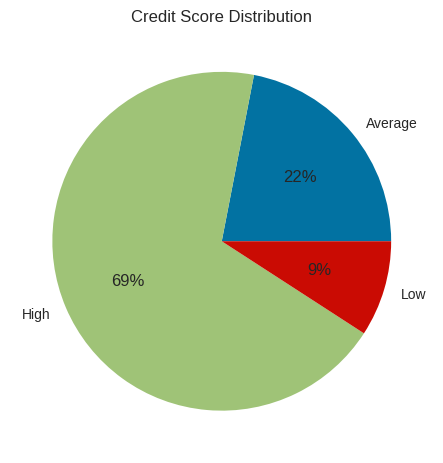

In [ ]:
# Visualização das classificações de crédito
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Credit Score Distribution')
plt.show()

Text(0.5, 1.0, 'Heatmap de Correlação')

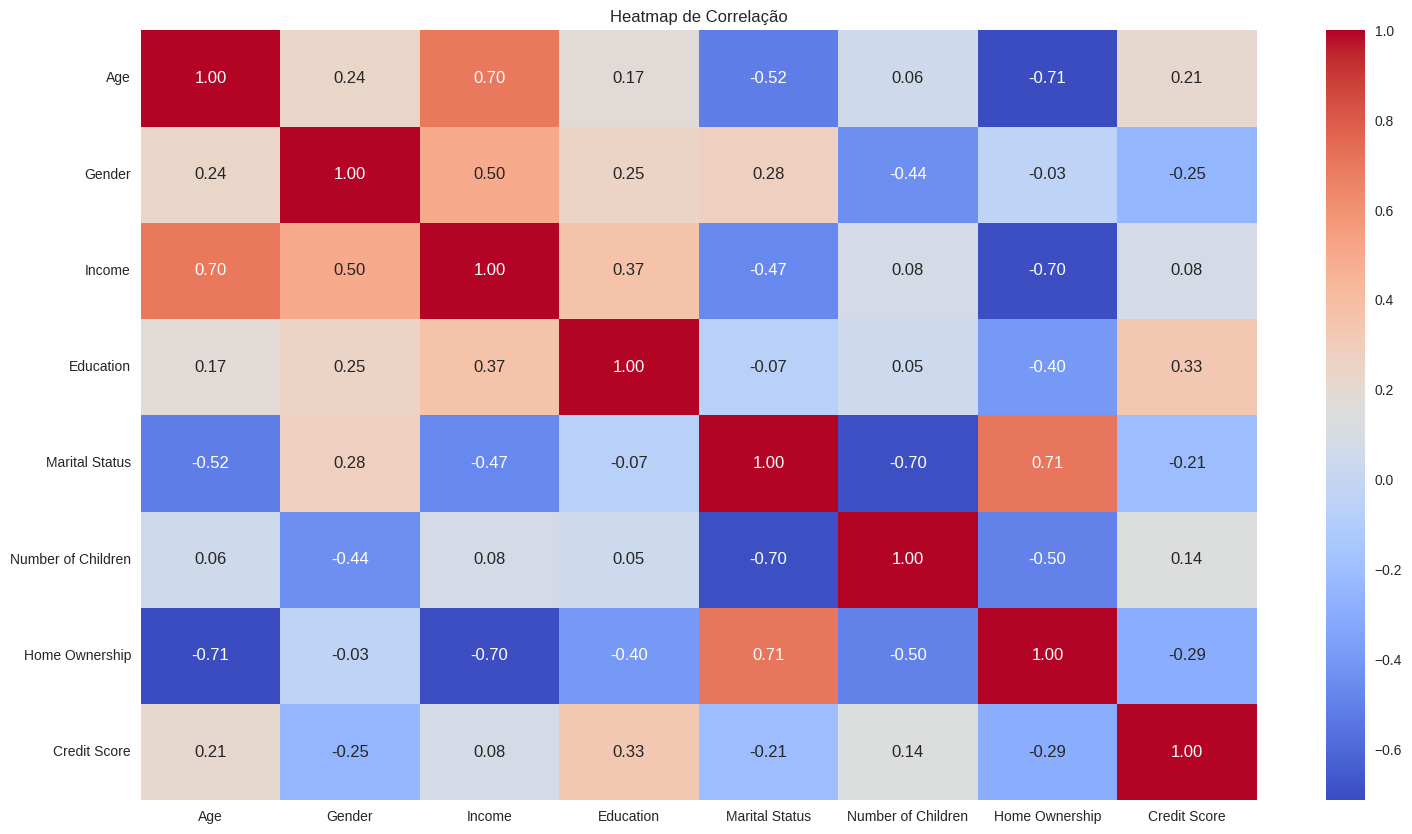

In [ ]:
# Visualizar a correlação entre os dados
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação')

## Insights - EDA

- Percebemos que não há dados faltantes;
- Há forte correlação entre as variáveis: idade (age) - renda (income) e estado civil (marital status) - casa própria (home ownership);
- A maioria dos clientes apresenta um score alto;
---

# Balanceamento de dados e comparação de modelos

In [ ]:
X = df.drop('Credit Score', axis = 1)
y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: Credit Score
1    90
0    31
2    10
Name: count, dtype: int64
Class distribution after resampling: Credit Score
1    90
0    90
2    90
Name: count, dtype: int64


In [ ]:
# Combinar os dataframes de treino e fazer o pré-processamento com o pycaret
train_data = pd.concat([X_train_res, y_train_res], axis=1)
s = setup(data=train_data, target='Credit Score', session_id=123, normalize=True)

# Comparação de modelos
compare_models()

,Description,Value
0,Session id,123
1,Target,Credit Score
2,Target type,Multiclass
3,Original data shape,"(270, 8)"
4,Transformed data shape,"(270, 8)"
5,Transformed train set shape,"(189, 8)"
6,Transformed test set shape,"(81, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9789,0.9840,0.9789,0.9818,0.9787,0.9683,0.9698,0.1170
rf,Random Forest Classifier,0.9789,0.9956,0.9789,0.9818,0.9788,0.9683,0.9698,0.5330
gbc,Gradient Boosting Classifier,0.9789,0.0000,0.9789,0.9818,0.9788,0.9683,0.9698,0.2980
et,Extra Trees Classifier,0.9789,0.9963,0.9789,0.9818,0.9788,0.9683,0.9698,0.1650
lr,Logistic Regression,0.9737,0.0000,0.9737,0.9773,0.9735,0.9604,0.9623,1.1480
dt,Decision Tree Classifier,0.9737,0.9801,0.9737,0.9773,0.9735,0.9604,0.9623,0.0720
xgboost,Extreme Gradient Boosting,0.9737,0.9920,0.9737,0.9773,0.9735,0.9604,0.9623,1.4180
lightgbm,Light Gradient Boosting Machine,0.9737,0.9924,0.9737,0.9773,0.9735,0.9604,0.9623,0.1280
svm,SVM - Linear Kernel,0.9684,0.0000,0.9684,0.9722,0.9682,0.9525,0.9547,0.1120
ada,Ada Boost Classifier,0.9526,0.0000,0.9526,0.9628,0.9509,0.9284,0.9345,0.2560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# Treino do modelo KNN

In [ ]:
# Modelo KNN
knn = create_model('knn')
preds = predict_model(knn)
scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)
print(preds)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
1,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9753,0.9907,0.9753,0.9770,0.9753,0.9630,0.9638


     Age  Gender  Income  Education  Marital Status  Number of Children  \
140   29       0   47500          0               1                   0   
268   27       0   32785          0               1                   0   
228   27       0   37500          3               1                   0   
205   28       0   32500          0               1                   0   
103   43       1   92500          4               1                   0   
..   ...     ...     ...        ...             ...                 ...   
11    29       0   68000          2               0                   2   
246   28       0   32148          0               1                   0   
238   28       0   32037          0               1                   0   
85    27       0   37500          3               1                   0   
76    50       1  155000          4               0                   0   

     Home Ownership  Credit Score  prediction_label  prediction_score  
140               1        

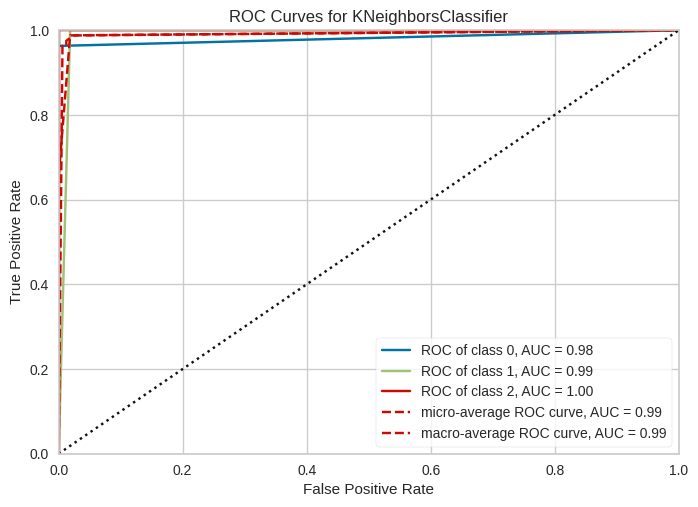

In [ ]:
# Visualização do gráfico do modelo knn
plot_model(knn)

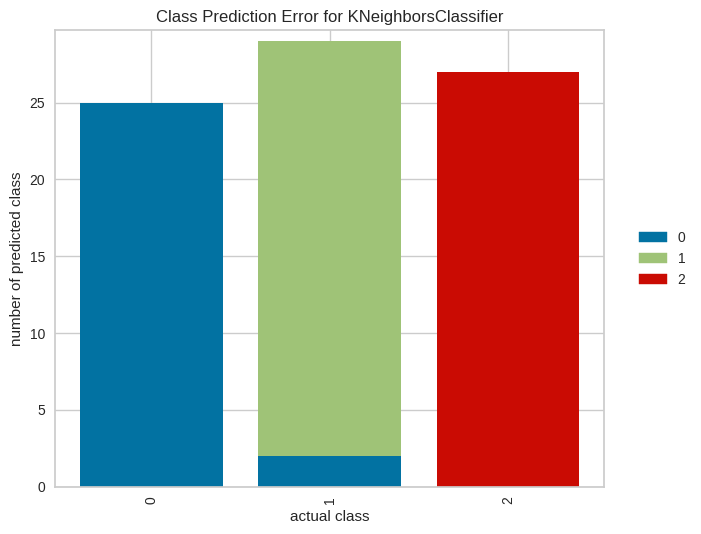

In [ ]:
# Visualização das classes
plot_model(knn, plot = 'error')

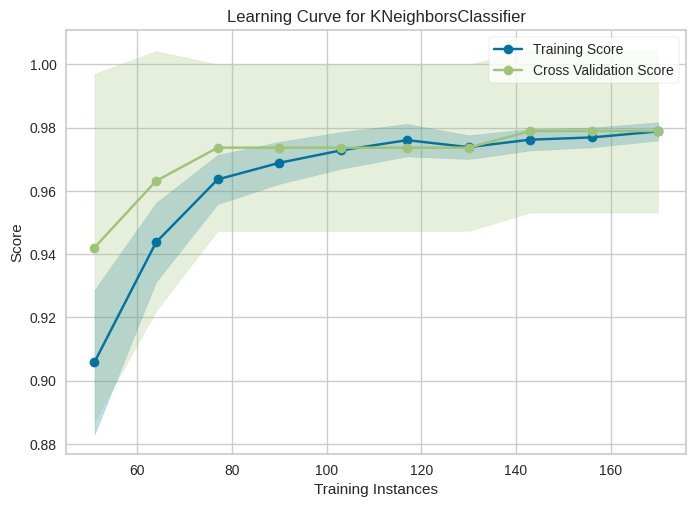

In [ ]:
# Visualização da curva de aprendizagem
plot_model(knn, plot = 'learning')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
1,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


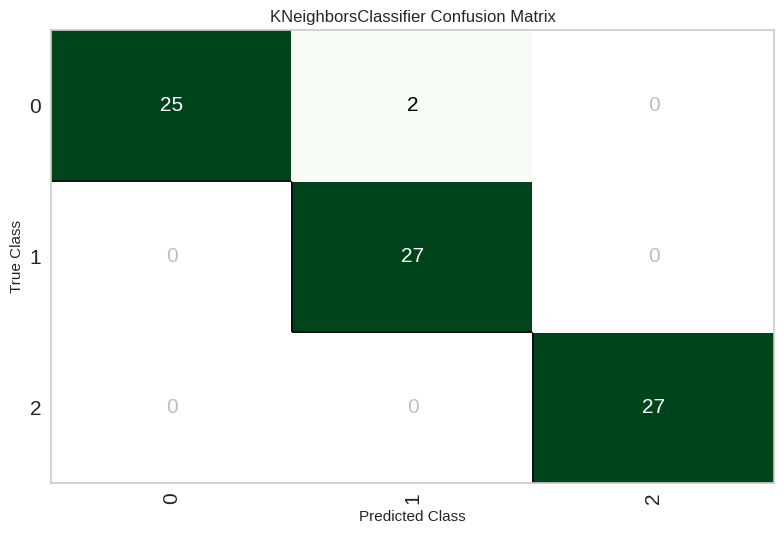

In [ ]:
# Otimização do modelo knn e matriz de confusão
knn_tuned = tune_model(knn)
plot_model(knn_tuned, plot='confusion_matrix')

# Resultados
---

## Análise de eficiência do modelo

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_res, y_train_res)
scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)
y_preds = clf.predict(X_test)
print("Classification Report")
print(classification_report(y_test, y_preds))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## Exemplo de novo cliente e aplicação do modelo

In [ ]:
new_data = pd.DataFrame({
    'Age': [35],
    'Gender': [1],
    'Income': [80000],
    'Education': [3],
    'Marital Status': [1],
    'Number of Children': [1],
    'Home Ownership': [1],
})

prediction = clf.predict(new_data)
print('Predição para novo cliente:', prediction)

Predição para novo cliente: [1]


## Conclusão

Para a construção do projeto foram utilizadas diversas formas de visualização de dados, desde análise do dataframe "puro", através do pandas, como também gráficos de barras, pizza e um mapa de calor.

Através destas ferramentas, pudemos notar algumas tendências (expostas anteriormente na EDA) e trabalhar em cima de um modelo para compreensão e classificação do score de crédito.

O dataframe completo, sem dados faltantes, portanto o pré-processamento foi simples, exigindo apenas um balanceamento dos dados (técnica SMOTE) e seleção de um modelo (no caso, o KNN por apresentar elevada acurácia e rápido processamento).

O modelo foi, então, construído e testado, tendo apresentado um bom rendimento e nos permitindo confiar em seu poder de predição, de forma que, através dele, podemos estruturar políticas e serviços mais eficientes.

Entre as principais características dos clientes, pudemos observar:
- Mais de dois terços (69%) possuem boa classificação de crédito, portanto, podemos oferecer melhores serviços e oportunidades de investimento para estes clientes, baseados no seu perfil específico;
- Ao quase um terço restante (31%) podem ser criadas políticas de educação financeira, investimentos simples para poupar dinheiro, serviços mais simples e baratos, promoções, e outras medidas que melhores a eficiência da operação;
- Devido à correlação entre idade e renda, podemos também pensar em serviços específicos baseados no perfil etário dos clientes (previdência privada, mercado de ações, criptomoedas, etc.).

Podemos concluir que o modelo supervisionado possui grande eficiência e é capaz de classificar corretamente os clientes conforme seu nível score de crédito, ajudando o planejamento da instituição financeira e a criação de projetos para evitar problemas futuros, diminuindo os riscos de operação.